In [12]:
%%bash
# extract data set
unzip ~/Workspace/DataMining/Aminer.txt.zip -d ~/Workspace/DataMining/

Archive:  /Users/aman/Workspace/DataMining/Aminer.txt.zip
  inflating: /Users/aman/Workspace/DataMining/AP_train.txt  
   creating: /Users/aman/Workspace/DataMining/__MACOSX/
  inflating: /Users/aman/Workspace/DataMining/__MACOSX/._AP_train.txt  


In [83]:
%%bash 
#print sample data
head /Users/aman/Workspace/DataMining/AP_train.txt

#index 1
#* Book Review: Discover Linux
#@ Marjorie Richardson
#t 1998
#c Linux Journal

#index 2
#* MOSFET table look-up models for circuit simulation
#@ 
#t 1984


In [ ]:
%%bash
# removing the abstact from each file 
# hence reducing the size the one-forth(https://aminer.org/citation )
sed -i '' '/^#!/d' ~/Workspace/DataMining/AP_train.txt

### A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [1]:
%%bash
#  getting the authors count 
grep '^#@' ~/Workspace/DataMining/AP_train.txt |tr ';' '\n'|tr -d '#@ '|sort|uniq -c |tail -n +2 |awk '{print $1","$2}' > authors.txt
cat authors.txt|wc -l

# getting the veneue count
grep '^#c' ~/Workspace/DataMining/AP_train.txt |tr -d '#c '|sort|uniq -c |awk '{print $1","$2}'> veneue.txt
cat veneue.txt|wc -l

#  getting the publications count
grep '^#index' ~/Workspace/DataMining/AP_train.txt |tr -d '#index '|wc -l

# getting the citations count
grep '^#%' ~/Workspace/DataMining/AP_train.txt |tr -d '#% '|sort|uniq -c|awk '{print $1","$2}' > reference.txt 
cat reference.txt| wc -l
grep '^#%' ~/Workspace/DataMining/AP_train.txt |wc -l

 1469776
  255593
 1976815
  871089
 7250326


### B.Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?

In [4]:
%%bash
grep -A5 '^#\* .*Principles and Practice of Knowledge Discovery in Databases' ~/Workspace/DataMining/AP_train.txt | grep '#\* ' |sort|uniq -c

   1 #* Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)
   1 #* Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)
   1 #* Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
   1 #* Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
   1 #* Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases


C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/aman/.envs/digit_rec/lib/python2.7/site-packages/matplotlib/__init__.py:955: UserWarning: Illegal line #1
	"TkAgg
"
	in file "/Users/aman/.matplotlib/matplotlibrc"
  warnings.warn('Illegal %s' % error_details)


In [52]:
data = pd.read_csv('authors.txt', header = None, names=["count","author_name"])

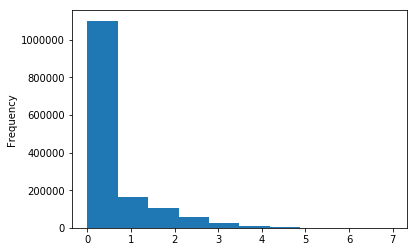

In [53]:
df = data.copy()
df['count'] = np.log(df['count'])
df['count'].plot( kind='hist')
plt.show()

D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [42]:
print data["count"].mean()
print data["count"].std()
print data["count"].quantile([0.25,0.5,0.75])

0.25    1.0
0.50    1.0
0.75    3.0
Name: count, dtype: float64

### E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

mean:  7.84170835695
std:  84.5815032851
quartiles:
0.25    1.0
0.50    1.0
0.75    1.0
Name: count, dtype: float64
max occurence:  IEEETransationsonInformationTheory


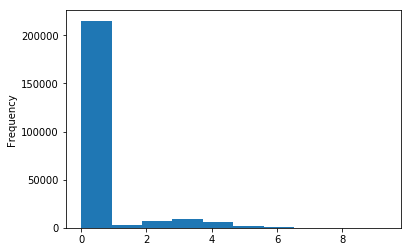

In [91]:
veneue_data = pd.read_csv('veneue.txt', header = None, names=["count","name"])
print 'mean: ', veneue_data["count"].mean()
print 'std: ', veneue_data["count"].std()
print 'quartiles:'
print veneue_data["count"].quantile([0.25,0.5,0.75])
print 'max occurence: ', veneue_data["name"][veneue_data["count"].idxmax()]
veneue_data['count'] = np.log(veneue_data['count'])
veneue_data['count'].plot(kind='hist')
plt.show()


In [ ]:
sed -i '' '/^#%/d' AP_new.txt
sed -i -e 's/#/\t/g' AP_new.txt 
sed -i -e 's/ index /\'$'\n''/g' AP_new.txt
sed -i -e 's/ ,@ /,/g' AP_new.txt
sed -i -e 's/ ,c / , /g' AP_new.txt
sed -i -e 's/ ,t / , /g' AP_new.txt
sed -i -e 's/ ,\* / , /g' AP_new.txt

# for ref chart
awk '{for(i=1;i<=NF;i++){if(NF==1){printf $1"\n";}else{if($i!=",")printf $1",%s\n", $i};}}' AP1_new.txt > AP_REF.TXT


### F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [ ]:
%%time
file_data = pd.read_csv('/Users/aman/Workspace/DataMining/AP_new.txt', sep=r' \\t ', header = None, names=["index","title","author","date", "veneue" ],engine='python')
ref_data = pd.read_csv('/Users/aman/Workspace/DataMining/AP_ref.txt', header = None, names=["index","ref"],engine='python')


In [1]:
# largest number of refernces
ref_data.groupby('index').count()['ref'].plot()
plt.show()
max_index = ref_data.groupby('index').count().idxmax()[0]
print file_data[file_data["index"] == max_index]['title']
print 'index: ',max_index , '\ncount: ',ref_data.groupby('index').count().max()[0]

NameError: name 'ref_data' is not defined

In [46]:
file_data

,index,title,author,date,veneue
0,1,Book Review: Discover Linux,Marjorie Richardson,1998,Linux Journal
1,2,MOSFET table look-up models for circuit simula...,NaN,1984,"Integration, the VLSI Journal"
2,3,The verification of the protection mechanisms ...,Virgil D. Gligor,1984,International Journal of Parallel Programming
3,4,Another view of functional and multivalued dep...,M. Gyssens;J. Paredaens,1984,International Journal of Parallel Programming
4,5,Entity-relationship diagrams which are in BCNF,Sushil Jajodia;Peter A. Ng;Frederick N. Spring...,1984,International Journal of Parallel Programming
5,6,The computer comes of age,Rene Moreau,1984,The computer comes of age
6,7,Computationally efficient algorithms for a one...,A. G. Akritas;S. S. Lyengar;A. A. Rampuria,1984,International Journal of Parallel Programming
7,8,The hierarchical ordering in Multiattribute files,C. C. Chang;M. W. Du;R. C. T. Lee,1983,Information Sciences: an International Journal
8,9,Insertion languages,David Haussler,1983,Information Sciences: an International Journal
9,10,The Three-Machine No-Wait Flow Shop is NP-Comp...,Hans Röck,1984,Journal of the ACM (JACM)


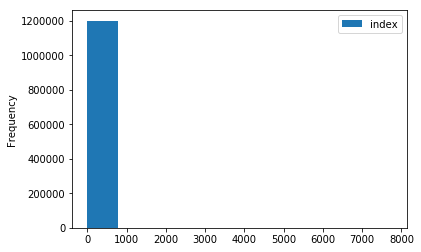

In [ ]:
ref_data.groupby('ref').count().plot()
plt.show()
# largest number of citation
index = int(ref_data.groupby('ref').count().idxmax()[0])
print file_data[file_data['index'] == index]["title"]
print 'count: ',ref_data.groupby('ref').count().max()[0]

### G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [3]:
joined_data = file_data.join(ref_data.set_index('index'),on='index')
# v_impact = []
# file_data_new = file_data.set_index('index')
# for veneue in file_data_new.veneue.unique():
#     indexes = file_data_new[file_data_new['veneue'] == veneue].index.values
#     citations = len(ref_data[ref_data['index'].isin(indexes) & ref_data['ref'].notnull()])
#     v_impact.append(citations/len(indexes))
# pd.Series(v_imapct).plot()
# plt.show()
    

In [ ]:
joined_data.groupby('veneue').count()

### H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

### I. Now repeat the calculation from G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

### J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

,index,title,author,date,veneue,index,ref
0,1.0,Book Review: Discover Linux,Marjorie Richardson,1998,Linux Journal,1,NaN
1,2.0,MOSFET table look-up models for circuit simula...,NaN,1984,"Integration, the VLSI Journal",2,NaN
2,3.0,The verification of the protection mechanisms ...,Virgil D. Gligor,1984,International Journal of Parallel Programming,3,NaN
3,4.0,Another view of functional and multivalued dep...,M. Gyssens;J. Paredaens,1984,International Journal of Parallel Programming,4,NaN
4,5.0,Entity-relationship diagrams which are in BCNF,Sushil Jajodia;Peter A. Ng;Frederick N. Spring...,1984,International Journal of Parallel Programming,5,NaN
5,6.0,The computer comes of age,Rene Moreau,1984,The computer comes of age,6,NaN
6,7.0,Computationally efficient algorithms for a one...,A. G. Akritas;S. S. Lyengar;A. A. Rampuria,1984,International Journal of Parallel Programming,7,NaN
7,8.0,The hierarchical ordering in Multiattribute files,C. C. Chang;M. W. Du;R. C. T. Lee,1983,Information Sciences: an International Journal,8,NaN
8,9.0,Insertion languages,David Haussler,1983,Information Sciences: an International Journal,9,NaN
9,10.0,The Three-Machine No-Wait Flow Shop is NP-Comp...,Hans Röck,1984,Journal of the ACM (JACM),10,10.0
